In [3]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [4]:
from pydub import AudioSegment

C:\Users\User\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [5]:
import numpy as np
import pandas as pad
import soundfile
import os
import glob
import sys

In [6]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [8]:
from IPython.display import Audio

In [9]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
RavdessData = "D:\\CUET\\Level-4, Term-2\\Thesis works\\ravdess data\\audio_speech_actors_01-24\\"

In [11]:
ravdessDirectoryList = os.listdir(RavdessData)
fileEmotion = []
filePath = []
for dir in ravdessDirectoryList:
    actor = os.listdir(RavdessData + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        fileEmotion.append(int(part[2]))
        filePath.append(RavdessData + dir + '/' + file)
emotion_df = pad.DataFrame(fileEmotion, columns=['Emotions'])
path_df = pad.DataFrame(filePath, columns=['Path'])
Ravdess_df = pad.concat([emotion_df, path_df], axis=1)

In [12]:
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear',7: 'disgust', 8: 'surprise'}, inplace=True)
Ravdess_df.head

<bound method NDFrame.head of       Emotions                                               Path
0      neutral  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1      neutral  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
2      neutral  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
3      neutral  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
4         calm  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
...        ...                                                ...
1435  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1436  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1437  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1438  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1439  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...

[1440 rows x 2 columns]>

In [13]:
dataPath = Ravdess_df.copy()
dataPath.head

<bound method NDFrame.head of       Emotions                                               Path
0      neutral  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1      neutral  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
2      neutral  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
3      neutral  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
4         calm  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
...        ...                                                ...
1435  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1436  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1437  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1438  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...
1439  surprise  D:\CUET\Level-4, Term-2\Thesis works\ravdess d...

[1440 rows x 2 columns]>

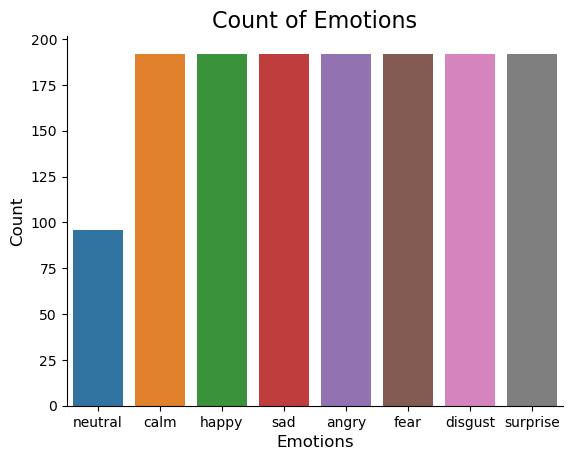

In [14]:
mplt.title('Count of Emotions', size=16)
sbn.countplot(data=dataPath, x='Emotions')
mplt.ylabel('Count', size=12)
mplt.xlabel('Emotions', size=12)
sbn.despine(top=True, right=True, left=False, bottom=False)
mplt.show()

In [15]:
def createWaveplot(data, sr, e):
    mplt.figure(figsize=(10, 3))
    mplt.title('Waveplot for audio with {} emotion'.format(e),size=15)
    librosa.display.waveshow(data, sr=sr)
    mplt.show()

In [16]:
def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    mplt.figure(figsize=(12, 3))
    mplt.title('Spectogram for audio with {} emotion'.format(e),size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    mplt.colorbar()

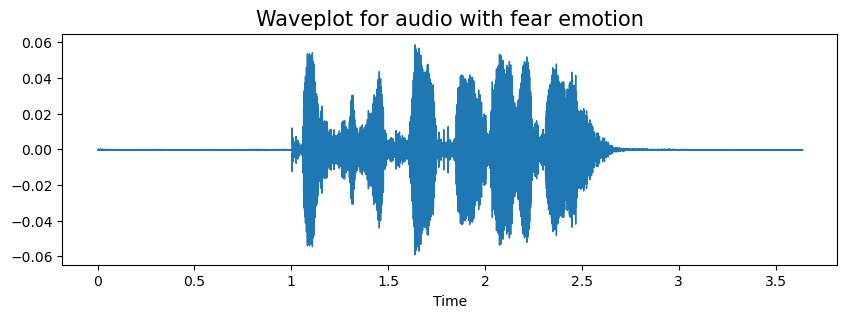

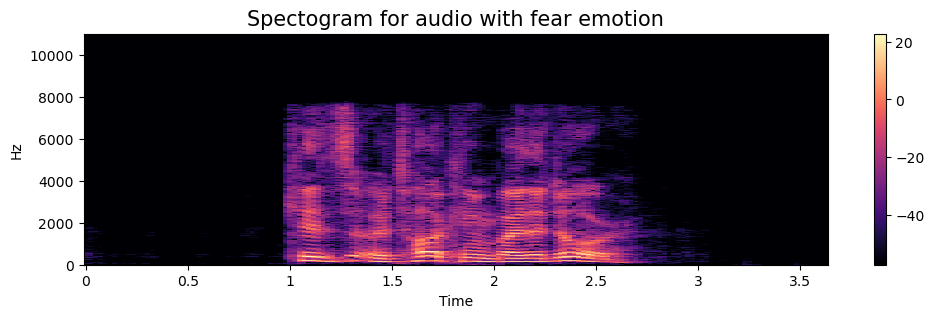

In [17]:
emotion='fear'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

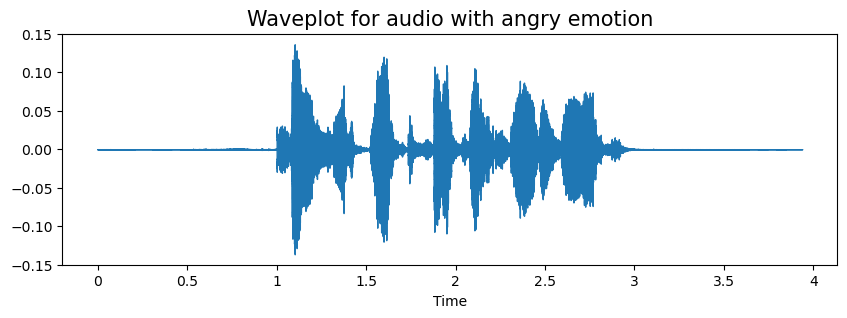

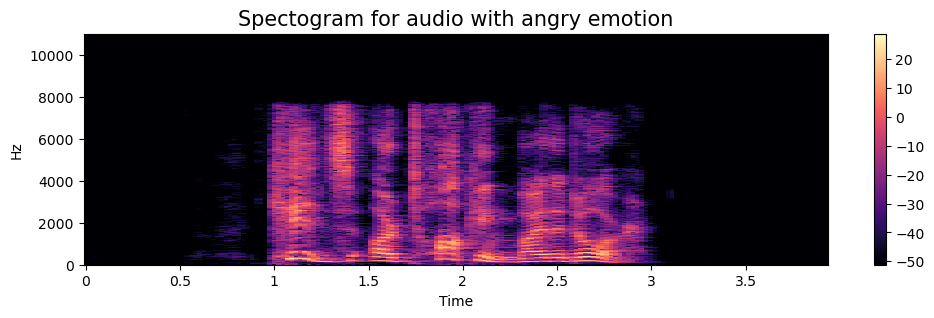

In [18]:
emotion='angry'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

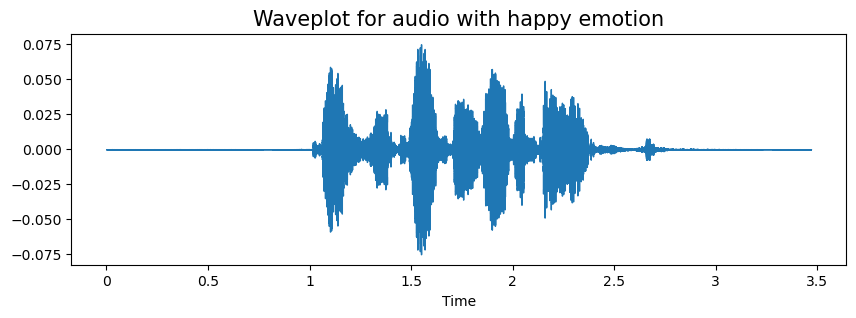

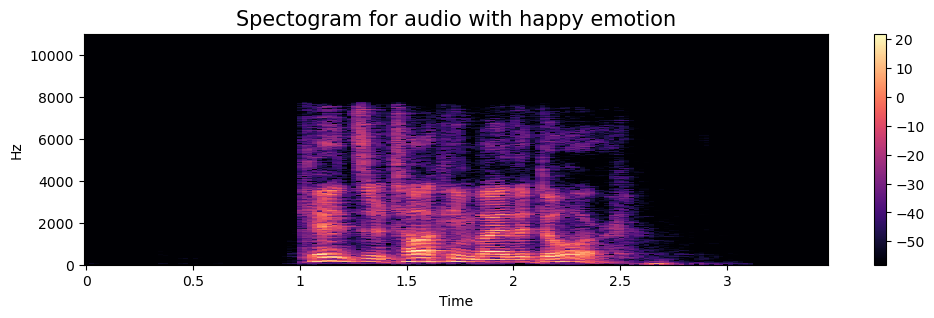

In [19]:
emotion='happy'
path = np.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

In [20]:
def noise(data):
    noiseAmp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noiseAmp*np.random.normal(size=data.shape[0])
    return data

#def stretch(data, rate=0.8):return librosa.effects.time_stretch(data, rate)
def stretch(data, rate=0.8):
    sound = AudioSegment(data.tobytes(), frame_rate=sampleRate, sample_width=data.dtype.itemsize, channels=1)
    stretched_sound = sound.speedup(playback_speed=1/rate)
    stretched_data = np.array(stretched_sound.get_array_of_samples(), dtype=np.float32)
    return stretched_data

def shift(data):
    shiftRange = int(np.random.uniform(low=-5, high=5)*1000)
    return np.roll(data, shiftRange)

def pitch(data, pitchFactor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampleRate, n_steps=int(abs(pitchFactor) * len(data) / sampleRate))


In [21]:
path = np.array(dataPath.Path)[1]
data, sampleRate = librosa.load(path)

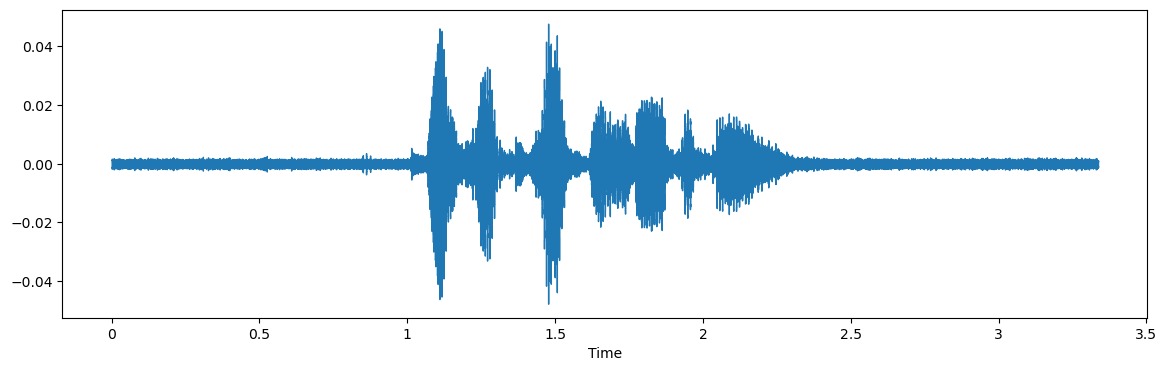

In [22]:
x = noise(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

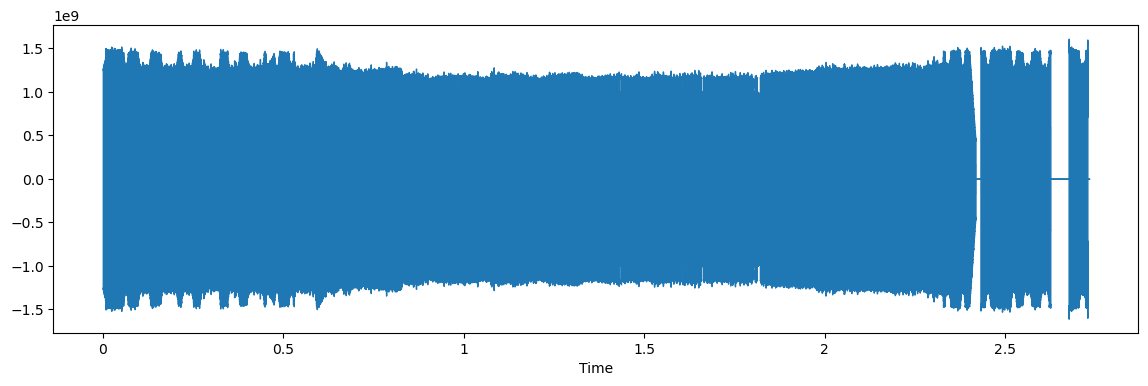

In [23]:
x = stretch(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

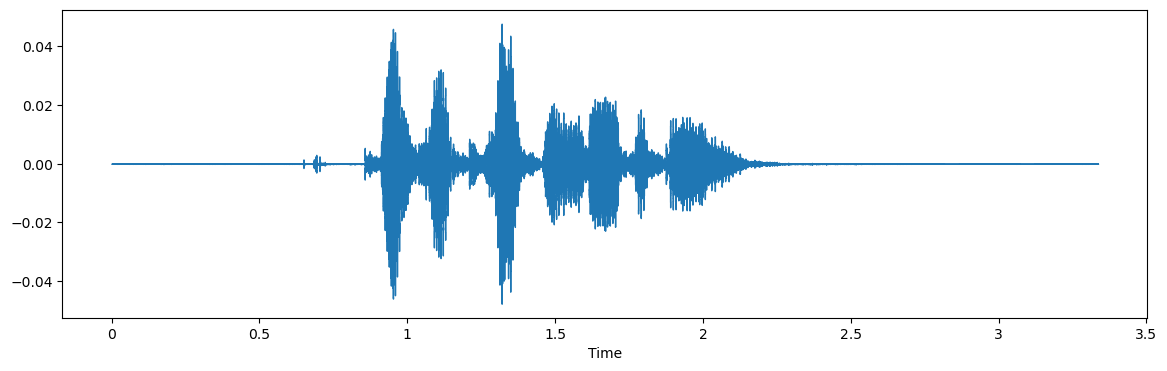

In [24]:
x = shift(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

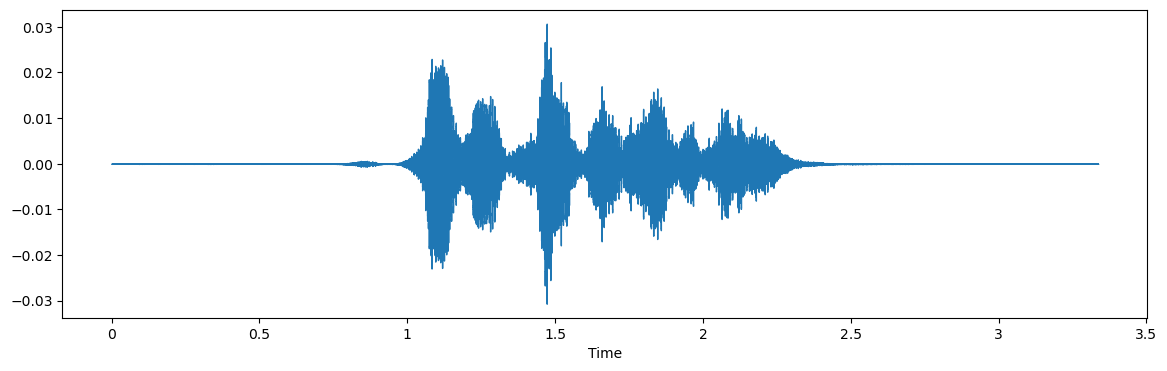

In [25]:
x = pitch(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

In [26]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel))
    return result

In [27]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprise'
}

#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fear', 'disgust']

In [43]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:\\CUET\\Level-4, Term-2\\Thesis works\\ravdess data\\RAVDESS\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [44]:
#Splitting dataset
xTrain,xTest,yTrain,yTest=load_data(test_size=0.23)

In [45]:
#Getting number of features extracted
print(f'Features extracted: {xTrain.shape[1]}')

Features extracted: 180


In [46]:
#Initializing the Multilayer-Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [47]:
#Training the model
model.fit(xTrain,yTrain)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [48]:
#Prediciting for test set
expected_Of_y = yTest
yPred=model.predict(xTest)

In [49]:
print(metrics.confusion_matrix(expected_Of_y, yPred))

[[49  3  0  1]
 [ 6 32  3  5]
 [ 3  3 23  6]
 [ 4  4  6 29]]


In [50]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

        calm       0.79      0.92      0.85        53
     disgust       0.76      0.70      0.73        46
        fear       0.72      0.66      0.69        35
       happy       0.71      0.67      0.69        43

    accuracy                           0.75       177
   macro avg       0.74      0.74      0.74       177
weighted avg       0.75      0.75      0.75       177



In [51]:
#Calculating accuracy of model
accuracy=accuracy_score(y_true=yTest, y_pred=yPred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.14%
